## Web scraping and analysis

### Scraping data from Skytrax

Source: [https://www.airlinequality.com/airline-reviews/british-airways] 
`Python` and `BeautifulSoup` are used to collect all the links to the reviews and then to collect the text data on each of the individual review links

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

for i in range(1, pages+1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight mainly let down by ...
1,✅ Trip Verified | Another awful experience b...
2,"✅ Trip Verified | The service was rude, full..."
3,✅ Trip Verified | This flight was a joke. Th...
4,✅ Trip Verified | This time British Airways ...


Removing the parts before | in the reviews column

In [4]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df

,reviews
0,Flight mainly let down by a disagreeable fl...
1,Another awful experience by British Airways...
2,"The service was rude, full of attitude to m..."
3,This flight was a joke. There was four peop...
4,This time British Airways managed to get ev...
...,...
1995,Gatwick to Mauritius. 12 hour flight delayed...
1996,"San Diego to London, an excellent flight wit..."
1997,Flew British Airways from London Heathrow to...
1998,Amsterdam to Gatwick was the usual short hau...


### Cleaning the text

In [5]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Flight mainly let down by a disagreeable fl...,Flight mainly let down by a disagreeable flig...
1,Another awful experience by British Airways...,Another awful experience by British Airways T...
2,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...
3,This flight was a joke. There was four peop...,This flight was a joke There was four people ...
4,This time British Airways managed to get ev...,This time British Airways managed to get ever...


### Sentiment Analysis of customer reviews

In [6]:
import nltk #natural language toolkit
nltk.download('punkt') #punkt is a pre-trained model that helps you tokenize words and sentences

#Tokenization
from nltk.tokenize import word_tokenize 

#POS tagging
from nltk import pos_tag

#Stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
nltk.download('omw-1.4') # Open Multilingual Wordnet
nltk.download('averaged_perceptron_tagger_eng') # POS tagger resource for English

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\rajas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [8]:
# POS tagger dictionary
#Maps the POS tag to the first letter of the wordnet POS types
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')): #excluding stopwords
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist
#token_stop_pos("That is a beautiful car which runs smoothly")

In [9]:
df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

,reviews,Cleaned Reviews,POS tagged
0,Flight mainly let down by a disagreeable fl...,Flight mainly let down by a disagreeable flig...,"[(Flight, n), (mainly, r), (let, v), (disagree..."
1,Another awful experience by British Airways...,Another awful experience by British Airways T...,"[(Another, None), (awful, a), (experience, n),..."
2,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...,"[(service, n), (rude, a), (full, a), (attitude..."
3,This flight was a joke. There was four peop...,This flight was a joke There was four people ...,"[(flight, n), (joke, n), (four, None), (people..."
4,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag..."


### Obtaining Stem words

In [10]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemmatized_output = " "
    for word, pos in pos_data:
     if not pos: #if the POS tag is not available word itself used as a lemma
        lemma = word
        lemmatized_output = lemmatized_output + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemmatized_output = lemmatized_output + " " + lemma
    return lemmatized_output

In [11]:
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Flight mainly let down by a disagreeable fl...,Flight mainly let down by a disagreeable flig...,"[(Flight, n), (mainly, r), (let, v), (disagree...",Flight mainly let disagreeable flight attend...
1,Another awful experience by British Airways...,Another awful experience by British Airways T...,"[(Another, None), (awful, a), (experience, n),...",Another awful experience British Airways fli...
2,"The service was rude, full of attitude to m...",The service was rude full of attitude to me t...,"[(service, n), (rude, a), (full, a), (attitude...",service rude full attitude food poorly servi...
3,This flight was a joke. There was four peop...,This flight was a joke There was four people ...,"[(flight, n), (joke, n), (four, None), (people...",flight joke four people business class inclu...
4,This time British Airways managed to get ev...,This time British Airways managed to get ever...,"[(time, n), (British, a), (Airways, n), (manag...",time British Airways manage get everything r...


In [15]:
dataset=df[['reviews','Lemma']]
dataset

,reviews,Lemma
0,Flight mainly let down by a disagreeable fl...,Flight mainly let disagreeable flight attend...
1,Another awful experience by British Airways...,Another awful experience British Airways fli...
2,"The service was rude, full of attitude to m...",service rude full attitude food poorly servi...
3,This flight was a joke. There was four peop...,flight joke four people business class inclu...
4,This time British Airways managed to get ev...,time British Airways manage get everything r...
...,...,...
1995,Gatwick to Mauritius. 12 hour flight delayed...,Gatwick Mauritius hour flight delay hour due...
1996,"San Diego to London, an excellent flight wit...",San Diego London excellent flight really goo...
1997,Flew British Airways from London Heathrow to...,Flew British Airways London Heathrow Dubai n...
1998,Amsterdam to Gatwick was the usual short hau...,Amsterdam Gatwick usual short haul commuter ...


### Sentiment Analysis using VADER

In [16]:
!pip install vaderSentiment


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [18]:
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

dataset['Polarity'] = dataset['Lemma'].apply(vadersentimentanalysis)
dataset

C:\Users\rajas\AppData\Local\Temp\ipykernel_22984\1124255176.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Polarity'] = dataset['Lemma'].apply(vadersentimentanalysis)


,reviews,Lemma,Polarity
0,Flight mainly let down by a disagreeable fl...,Flight mainly let disagreeable flight attend...,0.8860
1,Another awful experience by British Airways...,Another awful experience British Airways fli...,-0.8316
2,"The service was rude, full of attitude to m...",service rude full attitude food poorly servi...,-0.6437
3,This flight was a joke. There was four peop...,flight joke four people business class inclu...,-0.2960
4,This time British Airways managed to get ev...,time British Airways manage get everything r...,0.9831
...,...,...,...
1995,Gatwick to Mauritius. 12 hour flight delayed...,Gatwick Mauritius hour flight delay hour due...,0.8426
1996,"San Diego to London, an excellent flight wit...",San Diego London excellent flight really goo...,0.6590
1997,Flew British Airways from London Heathrow to...,Flew British Airways London Heathrow Dubai n...,-0.7269
1998,Amsterdam to Gatwick was the usual short hau...,Amsterdam Gatwick usual short haul commuter ...,0.6908


In [19]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
    
dataset['Sentiment'] = dataset['Polarity'].apply(vader_analysis)
dataset.head()

,reviews,Lemma,Polarity,Sentiment
0,Flight mainly let down by a disagreeable fl...,Flight mainly let disagreeable flight attend...,0.8860,Positive
1,Another awful experience by British Airways...,Another awful experience British Airways fli...,-0.8316,Negative
2,"The service was rude, full of attitude to m...",service rude full attitude food poorly servi...,-0.6437,Negative
3,This flight was a joke. There was four peop...,flight joke four people business class inclu...,-0.2960,Negative
4,This time British Airways managed to get ev...,time British Airways manage get everything r...,0.9831,Positive


In [21]:
vader_counts = dataset['Sentiment'].value_counts()
vader_counts

Sentiment
Positive    994
Negative    772
Neutral     234
Name: count, dtype: int64

### Visual Representation

([<matplotlib.patches.Wedge at 0x24aaa62a660>,
 [Text(0.010367084643158017, 1.0999511459860396, 'Positive'),
  Text(-0.4049366651053209, -1.0227542702200667, 'Negative'),
  Text(1.2598264513097388, -0.48511577234749936, 'Neutral')],
 [Text(0.005654773441722554, 0.5999733523560214, '49.7%'),
  Text(-0.2208745446029023, -0.5578659655745818, '38.6%'),
  Text(0.7932240619357613, -0.3054432640706477, '11.7%')])

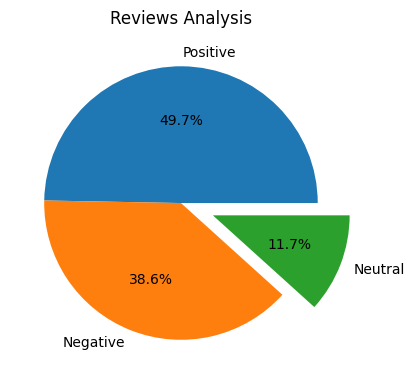

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [25]:
dataset.to_csv("BA_reviews.csv")

### Word Cloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


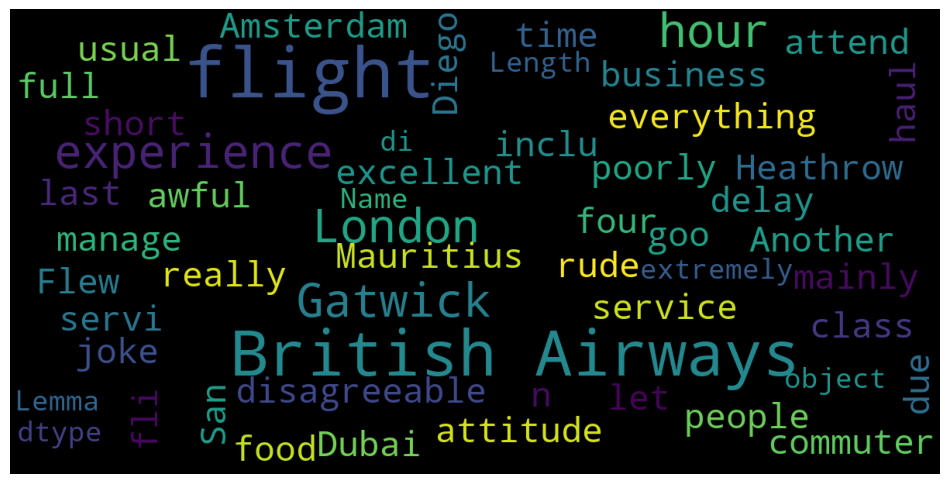

In [32]:
%pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dataset.Lemma)

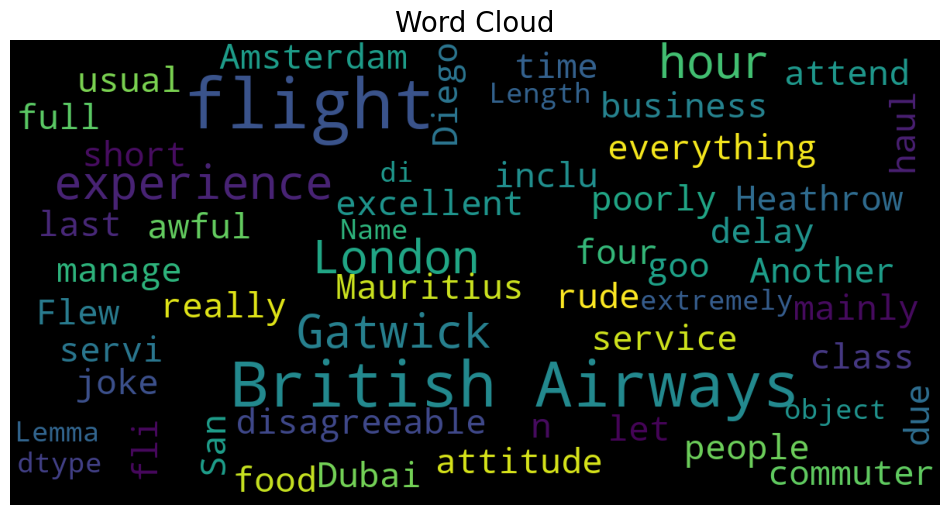

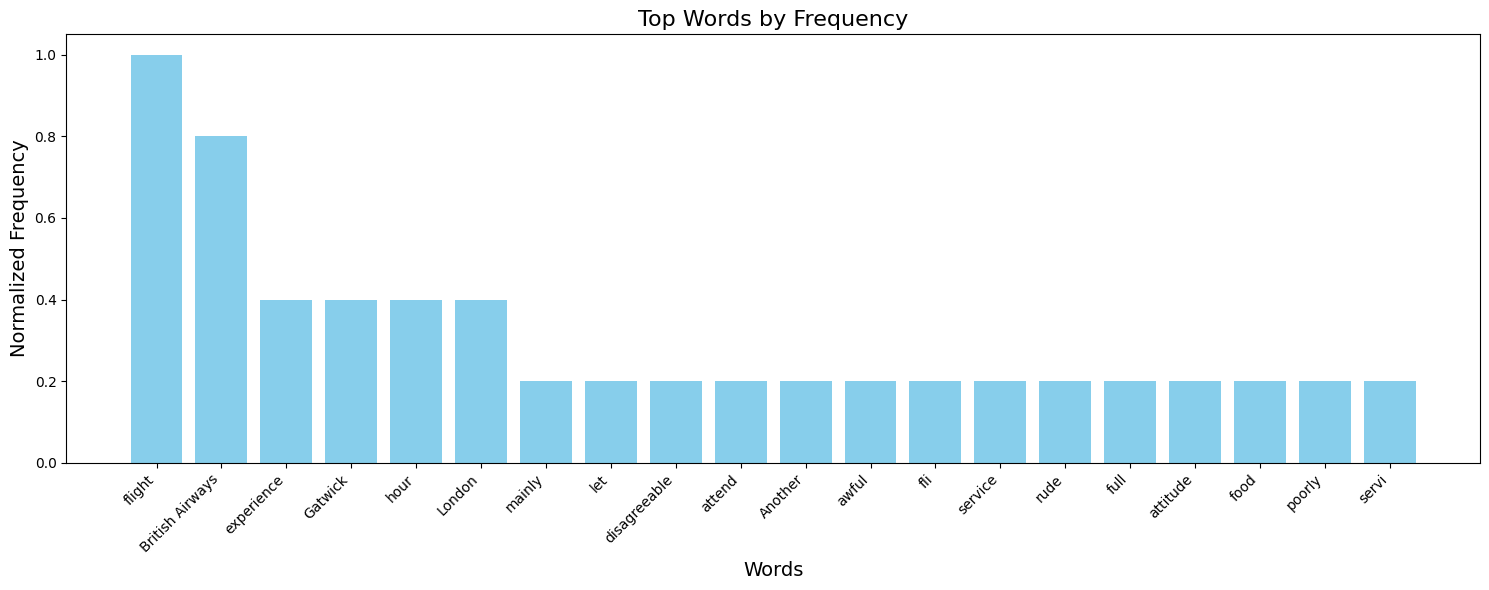

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Assuming the data `df['Lemma']` is preprocessed and available
def show_wordcloud_and_barplot(data):
    # Generate the word cloud
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1
    ).generate(str(data))
    
    # Display the word cloud
    plt.figure(figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.title("Word Cloud", fontsize=20)
    plt.show()

    # Extract word frequencies from the word cloud
    word_freq = wordcloud.words_  # This returns a dictionary of words and their frequencies

    # Convert the dictionary into two lists for plotting
    words = list(word_freq.keys())
    frequencies = list(word_freq.values())

    # Create a bar plot with the top words
    plt.figure(figsize=(15, 6))
    plt.bar(words[:20], frequencies[:20], color='skyblue')  # Display the top 20 words
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Words', fontsize=14)
    plt.ylabel('Normalized Frequency', fontsize=14)
    plt.title('Top Words by Frequency', fontsize=16)
    plt.tight_layout()
    plt.show()

# Call the function
show_wordcloud_and_barplot(dataset['Lemma'])
